In [3]:
from typing import List, Tuple, Dict, Union
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

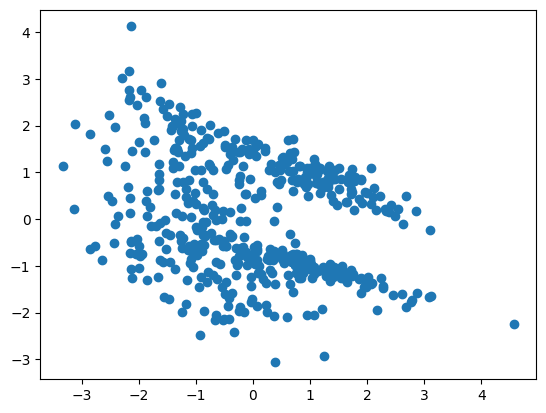

In [4]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_repeated=0, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:, 0], X[:, 1])

In [18]:
class DecisionTree:
    
    class Node:
        def __init__(self, 
                     value: List[Tuple[float]], 
                     left_subtree: object, 
                     right_subtree: object,
                     entropy: Tuple[int, int]):
            self.value = value
            self.left_subtree = left_subtree
            self.right_subtree = right_subtree
            self.entropy = entropy
    
    def __init__(self, max_depth:int = None) -> None:
        self.max_depth = max_depth
        
    def get_entropy(self, x, y) -> float:
        entropy = 0
        
        for cat in self.categories:
            prob = np.count_nonzero(y == cat) / len(y)
            entropy -= (prob) * np.log2(prob)
        
        return entropy
    
    def get_split_index(self, categories: List[int]):
        cat_streak = 0
        current_streak = 0
        index = 0
        
        for i in range(1, len(categories)):
            if categories[i] == categories[i-1]:
                current_streak += 1
            else:
                if cat_streak <= current_streak:
                    cat_streak = current_streak
                    index = i
                    
                current_streak = 0
        return index
        
    def build(self, X: List[Tuple[float, float]], y: List[int]) -> None:
        self.tree = self.get_node(X, y)
    
    def get_node(self, X: List[Tuple[float, float]], y: List[int]) -> Node:
        self.categories = set(y)
        current_entropy = self.get_entropy(X, y)
        
        if current_entropy == 0:
            return self.Node(value=X, left_subtree=None, right_subtree=None, entropy=current_entropy)
        
        split_index = self.get_split_index(y)
        
        node = self.Node(value=X, 
                    left_subtree=self.get_node(X[:split_index], y[:split_index]),
                    right_subtree=self.get_node(X[split_index:], y[split_index:]),
                    entropy=current_entropy)
        return node
        
    def display(self, node):
        print(node.value)
        
        if node.left_subtree != None:
            return self.display(node.left_subtree)
        if node.right_subtree != None:
            return self.display(node.right_subtree)

In [19]:
tree = DecisionTree()
tree.build(X_test, y_test)
tree.display(tree.tree)

[[ 1.21389909  0.67202998]
 [-1.21620303  1.93447609]
 [-1.45067846 -0.91820174]
 [ 1.50329493  1.1021087 ]
 [ 0.79801564 -0.92201618]
 [ 2.39062431  0.1452731 ]
 [ 1.37082355 -1.18617199]
 [ 1.29148802  1.02217899]
 [-0.98859104 -0.17297174]
 [-1.86440554  2.62197263]
 [-2.28617613  3.01559826]
 [ 1.37363546  0.52606617]
 [ 1.32097708  0.88019623]
 [ 0.67894731  1.2961372 ]
 [ 0.34673598 -0.80783843]
 [ 0.65648964  1.41357872]
 [-2.16989293  3.17336289]
 [-2.12803299 -0.49741396]
 [-2.42837964 -0.50212082]
 [ 1.42824952  1.04777139]
 [-0.1146414  -0.0350483 ]
 [-0.33579745 -2.41020937]
 [-0.91549553  1.91204585]
 [ 0.37712725 -0.68016511]
 [-2.13883178 -0.45760858]
 [-1.07338356  1.99698185]
 [-0.79340634 -1.13609181]
 [-0.47904864  1.08260656]
 [-2.18224373  0.68315771]
 [-0.73845677 -0.29732954]
 [-0.44172288  1.16110241]
 [ 1.76534206  0.81627982]
 [-2.41814875  1.97289364]
 [-1.08055665  0.05463084]
 [ 1.09714998  0.92651041]
 [-0.77519643  1.1868296 ]
 [ 1.39291776  0.86747527]
 